# Advertising and Sales dataset

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Exploratory Data Analysis

Here we load the dataset, understand the structure of it, check for primary summary statistics, and visualise it to explore the patterns in the data.

In [90]:
# Load the dataset

df = pd.read_csv('./Advertising and Sales dataset/Advertising And Sales.csv')

In [12]:
# Check the first five observations

df.head()

   ID     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   12.8       58.4   12.9


In [13]:
# Print the basic summary of the dataset

df.describe()

               ID          TV      Radio   Newspaper     Sales
count  200.000000  200.000000  200.00000  200.000000  200.0000
mean   100.500000  147.032500   23.28950   30.554000   14.0380
std     57.879185   85.885186   14.86997   21.778621    5.2094
min      1.000000    0.700000    0.00000    0.300000    1.6000
25%     50.750000   74.375000   10.07500   12.750000   10.4000
50%    100.500000  149.750000   22.90000   25.750000   12.9000
75%    150.250000  218.825000   36.52500   45.100000   17.4000
max    200.000000  296.400000   49.60000  114.000000   27.0000


In [15]:
# Check for missing values

df.isnull().sum()

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

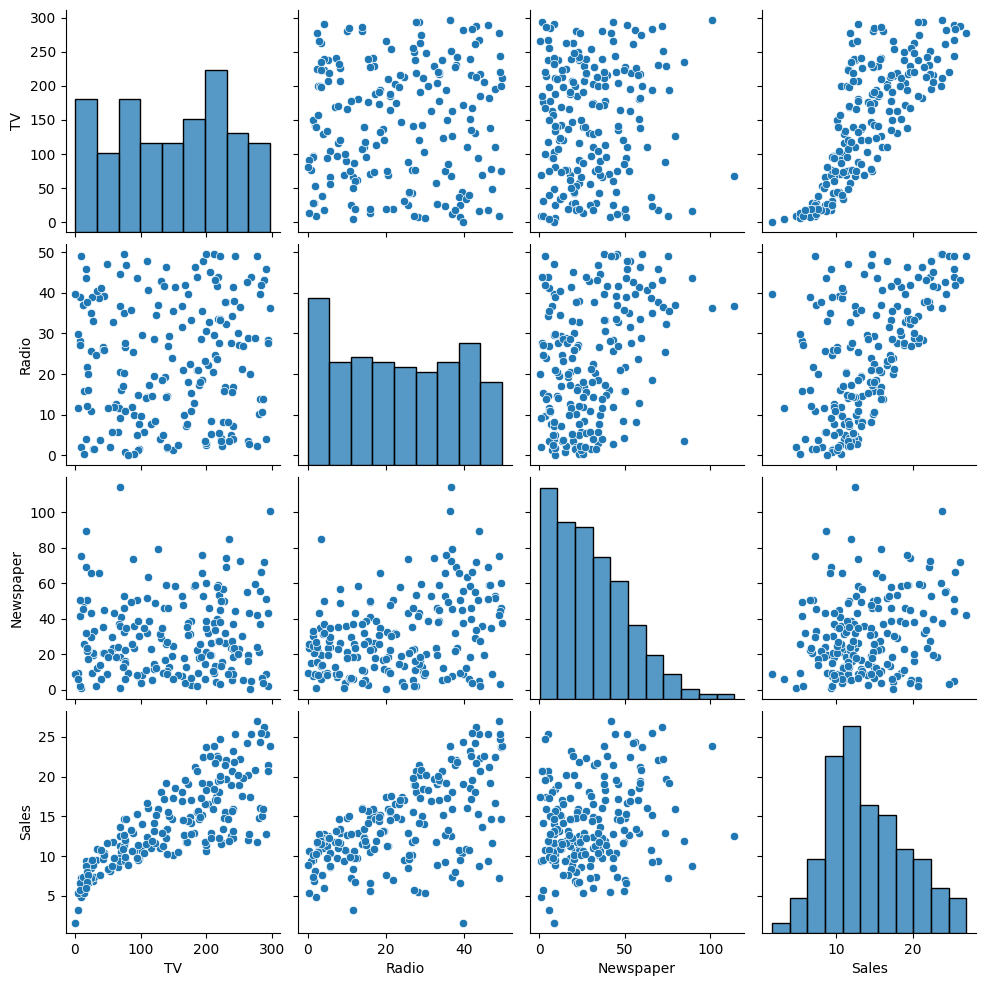

In [22]:
# Pairplot to visualise relationships between variables

sns.pairplot(df.iloc[:,1:])
plt.show()

In [23]:
# Correlation matrix

df.corr()

,ID,TV,Radio,Newspaper,Sales
ID,1.000000,0.017639,-0.110714,-0.154944,-0.049469
TV,0.017639,1.000000,0.056832,0.056801,0.783250
Radio,-0.110714,0.056832,1.000000,0.355082,0.574929
Newspaper,-0.154944,0.056801,0.355082,1.000000,0.226872
Sales,-0.049469,0.783250,0.574929,0.226872,1.000000


In the pair plot above, we can see that for TV and Radio, the higher the budget, the more sales. For Newspaper, it seems like there is no clear relationship. Indeed, the correlation between each marketing channel and sales shows that there is no strong correlation between expenditure in newspaper advertisement and sales.

When we build a regression model, we assume normality of the response variable. Although a perfect normality is almost impossible to observe in real world data, it is important that there exists normality to some extent for our model to be of valid use. Below, we visualise the distribution of `Sales`. We can see the distribution draws a bell-curve.

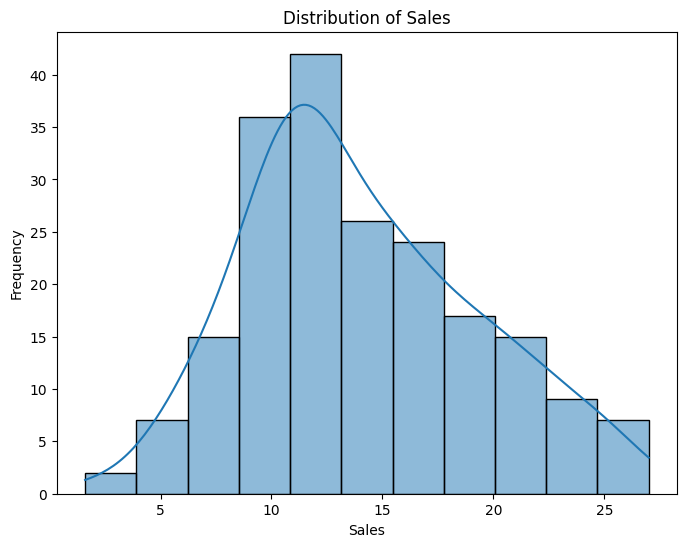

In [24]:
# Distribution of Sales to check normality
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Modelling

We now design a prediction model that assumes the sales performance based on the advertisement expenditures spent on three marketing channels: TV, radio, and newspaper. 

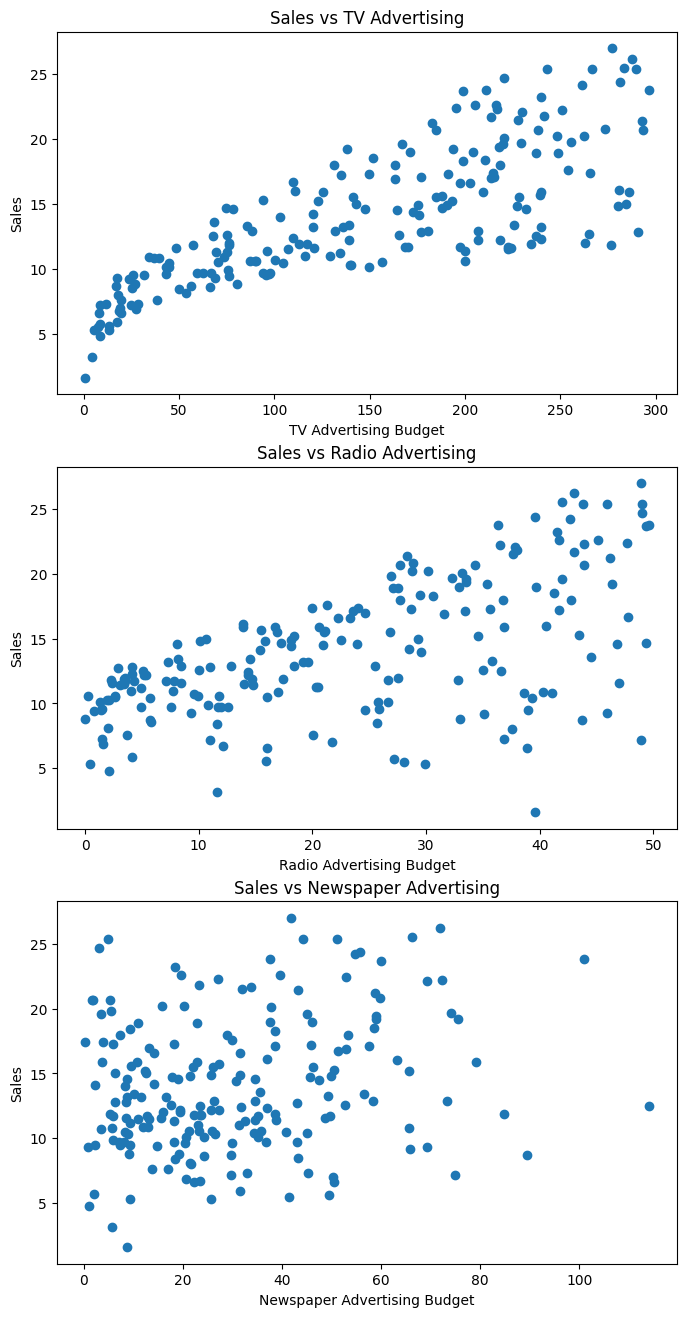

In [55]:
# Scatterplots

fig = plt.figure(figsize = (8, 16))


plt.subplot(3,1,1)
plt.scatter(df['TV'], df['Sales'])
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')

plt.subplot(3,1,2)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Sales vs Radio Advertising')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')

plt.subplot(3,1,3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Sales vs Newspaper Advertising')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.show()

In [57]:
# Define features and target variable

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [58]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Initialise the model

model = LinearRegression()

In [60]:
# Train the model

model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Make predictions

y_pred = model.predict(X_test)

In [65]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.1573345916468694
R^2 Score: 0.8999691031175159


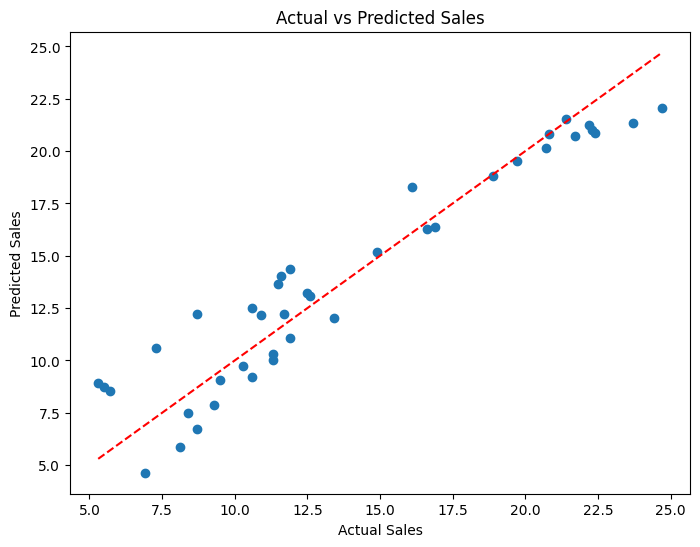

In [66]:
# Plot actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Feature Engineering

Although a simple linear regression model showed quite a good prediction performance with $R^2$ score of approximately 0.90, we try to further improve the model through feature engineering. That is, we manipulate the dataset for better accuracy. 

There are possible things that we should consider. 

1) Should we continue spending money on newspaper advertisement?: It seems like there is no apparent relationship between the expenditure on newspaper advertisement and total sales. If so, should we keep spending moeny or stop newspaper ads? If the former, how much money should we spend on it?
2)

We first try log-transformation. 

In [91]:
# Log transformation of features

df['Log_TV'] = np.log1p(df['TV'])
df['Log_Radio'] = np.log1p(df['Radio'])
df['Log_Newspaper'] = np.log1p(df['Newspaper'])

log_features = ['Log_TV', 'Log_Radio', 'Log_Newspaper']

In [71]:
# Define features and target variable

X = df[log_features]
y = df['Sales']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initialize the model
model = LinearRegression()

In [74]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Make predictions
y_pred = model.predict(X_test)

In [76]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.7470871526800664
R^2 Score: 0.8812845209465393


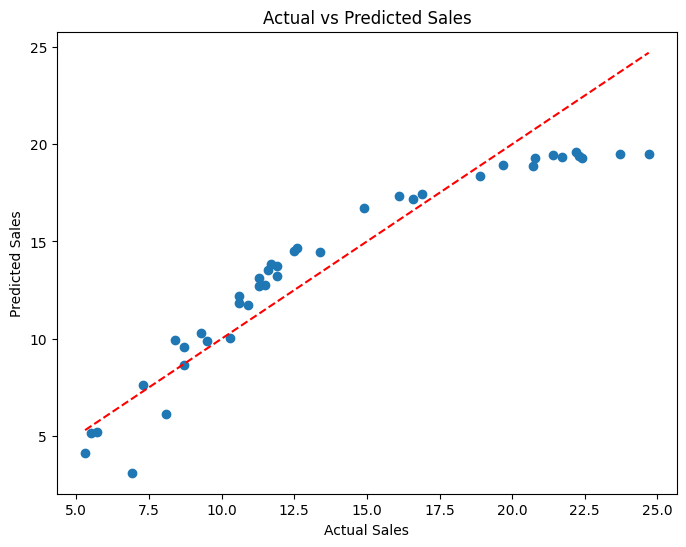

In [77]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

It seems like the log transformation shows poorer performance when compared to the original model. 

We now consider containing interaction terms. People do not just choose one media. They read the newspaper in the morning, listen to the radio when they drive, and watch the TV in the evening. They are exposed to multiple marketing channels, so we might have a better prediction performance when we consider this combined effect of any two features.

In [97]:
# Interaction features

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interaction_features = poly.fit_transform(df[['TV', 'Radio', 'Newspaper']])
interaction_feature_names = poly.get_feature_names_out(['TV', 'Radio', 'Newspaper'])
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)

interaction_df.head()

,TV,Radio,Newspaper,TV Radio,TV Newspaper,Radio Newspaper
0,230.1,37.8,69.2,8697.78,15922.92,2615.76
1,44.5,39.3,45.1,1748.85,2006.95,1772.43
2,17.2,45.9,69.3,789.48,1191.96,3180.87
3,151.5,41.3,58.5,6256.95,8862.75,2416.05
4,180.8,12.8,58.4,2314.24,10558.72,747.52


In [98]:
# Define features and target variable

X = interaction_df[interaction_feature_names]
y = df['Sales']

In [99]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Initialize the model

model = LinearRegression()

In [101]:
# Train the model

model.fit(X_train, y_train)

LinearRegression()

In [102]:
# Make predictions

y_pred = model.predict(X_test)

In [103]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.8049594948979806
R^2 Score: 0.9744972165947364


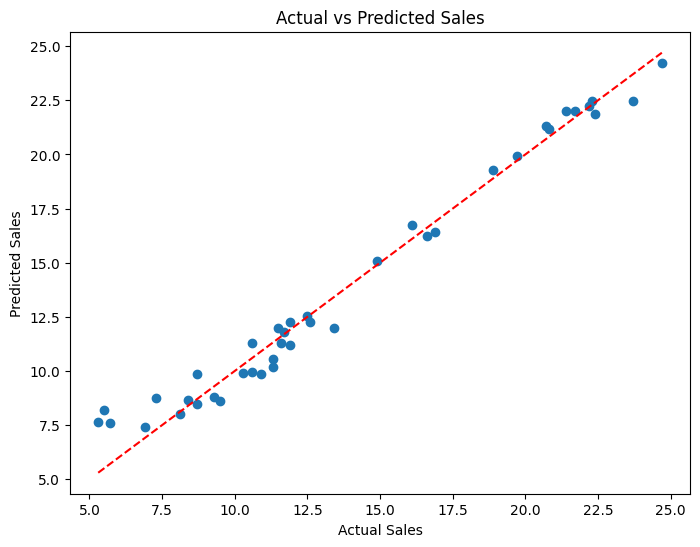

In [104]:
# Plot actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

We can see that indeed including the interaciton term hugely increased the performance of the model.

We now try to find an optimal budget distribution for each marketing channel. This is done by defining the optimisation problem where the objective is to maximise sales subject to our constraint on the ttal advertising budget constraint.

In [108]:
from scipy.optimize import minimize

# Define the sales prediction function using the trained model
def predict_sales(budget, model, poly):
    # Transform the budget input using polynomial features
    budget_transformed = poly.transform([budget])
    return model.predict(budget_transformed)[0]

# Define the objective function to minimize (negative sales to maximize sales)
def objective(budget, model, poly):
    return -predict_sales(budget, model, poly)

# Define the constraint (total budget)
def budget_constraint(budget):
    total_budget = 300  # Example total budget, adjust as needed
    return total_budget - np.sum(budget)

# Initial guess for the budget allocation
initial_budget = [100, 100, 100]  # Initial allocation for TV, Radio, and Newspaper

# Bounds for each budget (cannot be negative)
bounds = [(0, None), (0, None), (0, None)]

# Constraints definition
constraints = {'type': 'eq', 'fun': budget_constraint}

# Perform the optimization
result = minimize(objective, initial_budget, args=(model, poly), bounds=bounds, constraints=constraints)

# Print the optimal budget allocation
optimal_budget = result.x

print(f"Optimal Budget Allocation:\nTV: {optimal_budget[0]:.2f}\nRadio: {optimal_budget[1]:.2f}\nNewspaper: {optimal_budget[2]:.2f}")

Optimal Budget Allocation:
TV: 146.37
Radio: 153.63
Newspaper: 0.00


/Users/fredjeong/Desktop/DS Projects/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/fredjeong/Desktop/DS Projects/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/fredjeong/Desktop/DS Projects/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/fredjeong/Desktop/DS Projects/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/fredjeong/Desktop/DS Projects/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Polynomial